In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Percentage of sentiments of the labelled data for each labelling tool

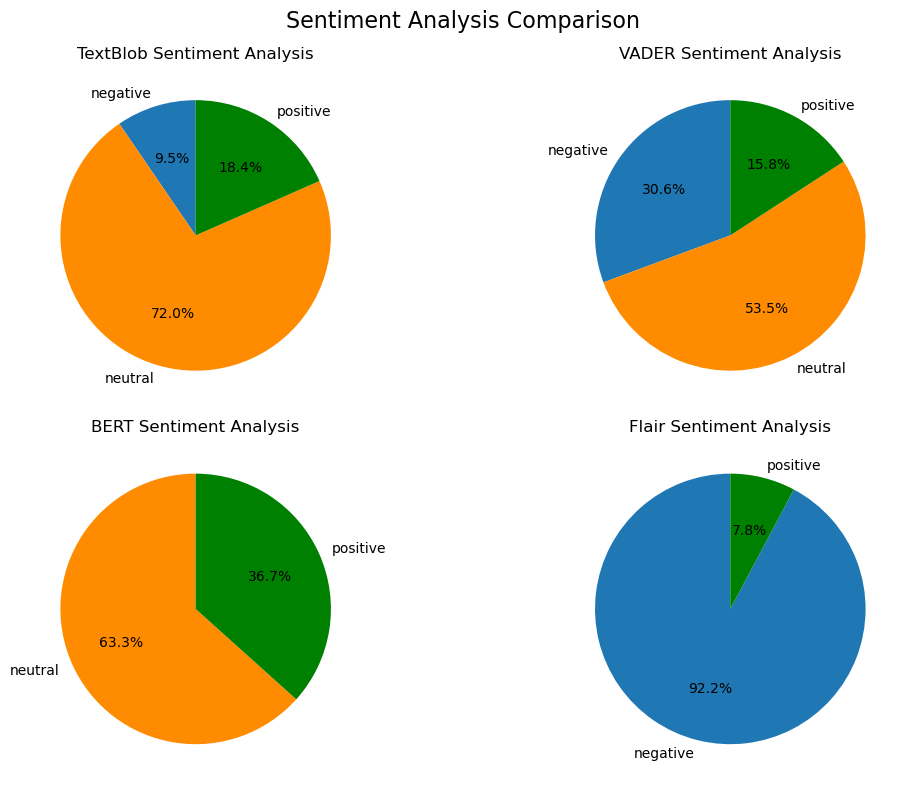

In [2]:
labelled_textblob = pd.read_csv('../2_Labelled_Data/textblob_label.csv')
labelled_vader = pd.read_csv('../2_Labelled_Data/vader_label.csv')
labelled_bert = pd.read_csv('../2_Labelled_Data/bert_label.csv')
labelled_flair = pd.read_csv('../2_Labelled_Data/flair_label.csv')

# Create subplots with 2 rows and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Sentiment Analysis Comparison', fontsize=16)

# TextBlob Sentiment Analysis
textblob_sentiment_counts = labelled_textblob.groupby('textblob_label')['headline_text'].count()
ax = axes[0, 0]
colors = ['#1F77B4', '#FF8C00', '#008000'] 

textblob_sentiment_counts.plot(kind='pie', ax=ax, autopct='%1.1f%%', startangle=90, colors=colors)
ax.set_title('TextBlob Sentiment Analysis')
ax.set_ylabel('')

# VADER Sentiment Analysis
vader_sentiment_counts = labelled_vader.groupby('vader_label')['headline_text'].count()
ax = axes[0, 1]
colors = ['#1F77B4', '#FF8C00', '#008000'] 

vader_sentiment_counts.plot(kind='pie', ax=ax, autopct='%1.1f%%', startangle=90, colors=colors)
ax.set_title('VADER Sentiment Analysis')
ax.set_ylabel('')

# BERT Sentiment Analysis
bert_sentiment_counts = labelled_bert.groupby('bert_label')['headline_text'].count()
ax = axes[1, 0]
colors = ['#FF8C00', '#008000', '#1F77B4'] 
bert_sentiment_counts.plot(kind='pie', ax=ax, autopct='%1.1f%%', startangle=90, colors=colors)
ax.set_title('BERT Sentiment Analysis')
ax.set_ylabel('')

# Flair Sentiment Analysis
flair_sentiment_counts = labelled_flair.groupby('flair_label')['headline_text'].count()
ax = axes[1, 1]
colors = ['#1F77B4', '#008000', '#FF8C00'] 

flair_sentiment_counts.plot(kind='pie', ax=ax, autopct='%1.1f%%', startangle=90, colors=colors)
ax.set_title('Flair Sentiment Analysis')
ax.set_ylabel('')


plt.tight_layout()
plt.show()


### Accuracies for each classification model with the labelling tools

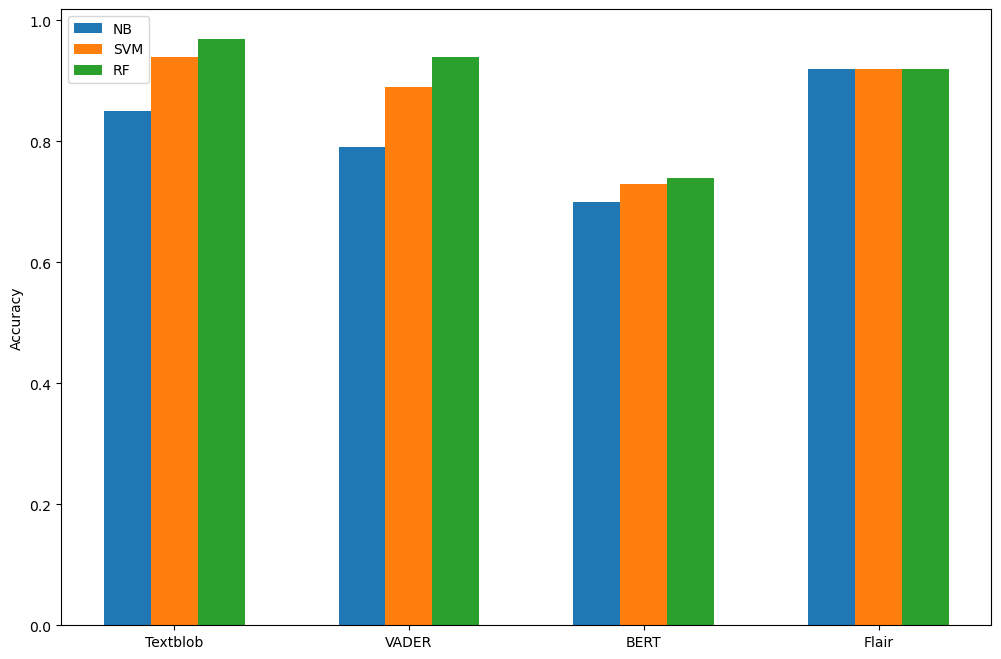

In [3]:
# Read the CSV dataframe
df = pd.read_csv("../4_Results/model_results.csv")

# Create a list of models and labeling tools
models = df['Model'].unique()
labeling_tools = df['Label Tool'].unique()

# Create a figure and axes for the bar chart
fig, ax = plt.subplots(figsize=(12, 8))

# Set the width of each bar
bar_width = 0.2

# Set the positions of the bars on the x-axis
r1 = np.arange(len(labeling_tools))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Iterate over each model
for i, model in enumerate(models):
    # Get the subset of data for the current model
    model_data = df[df['Model'] == model]
    
    # Get the accuracy values for each labeling tool
    accuracies = model_data['Test Accuracy']
    
    # Plot the bar chart for the current model
    ax.bar(r1 + (bar_width * i), accuracies, width=bar_width, label=model)
    
# Set the x-axis tick labels as labeling tools
ax.set_xticks(r2)
ax.set_xticklabels(labeling_tools)

# Set the y-axis label
ax.set_ylabel('Accuracy')

# Add a legend
ax.legend()

# Show the plot
plt.show()


### Bar graphs showing the counts of each sentiment per month for each year

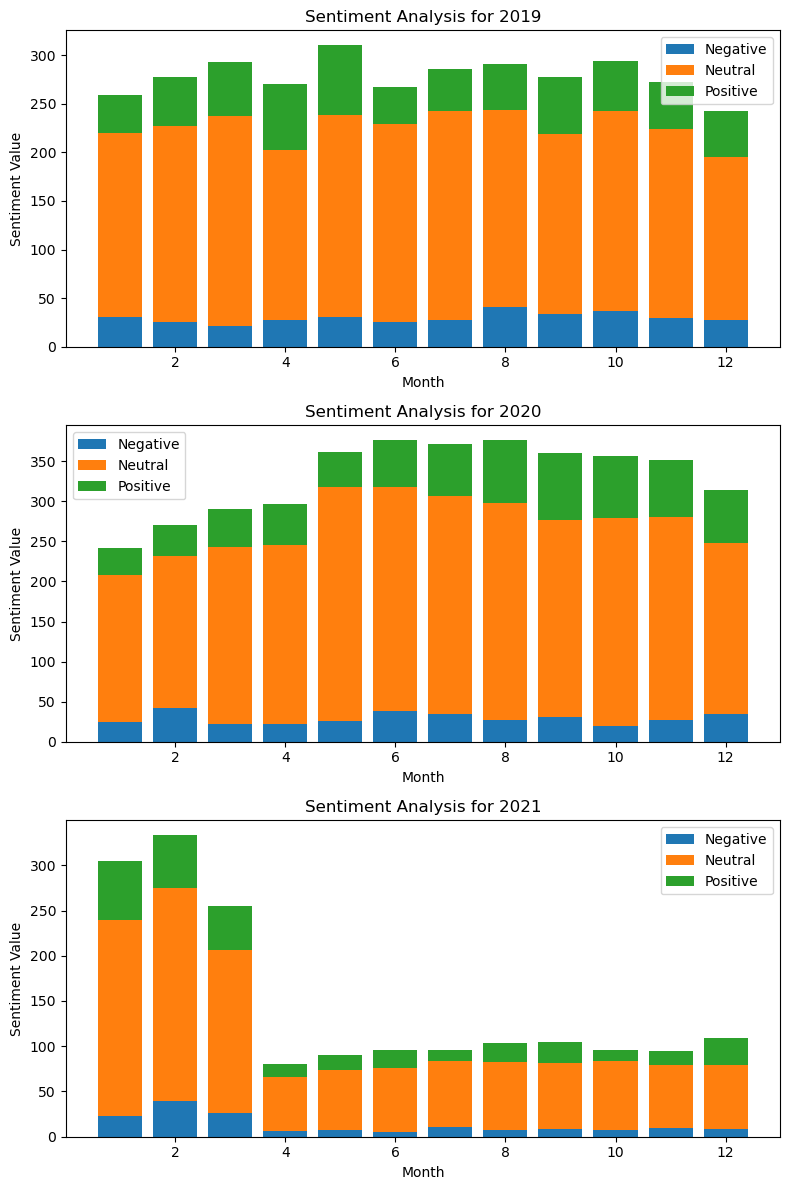

In [5]:
# Load CSV data into a Pandas dataframe
sentiment_counts = pd.read_csv('../3_Trend_Data/sentiment_counts.csv', index_col=0)

# Group the data by year and month
grouped = sentiment_counts.groupby(['year', 'month']).sum().reset_index()

# Define the order of the months
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Convert the month column to a categorical variable with the correct order
grouped['month'] = pd.Categorical(grouped['month'], ordered=True)
grouped = grouped.sort_values('month')

# Create subplots for each year
years = [2019, 2020, 2021]

fig, axs = plt.subplots(len(years), 1, figsize=(8, 12))

for i, year in enumerate(years):
    year_data = grouped[grouped['year'] == year]
    
    axs[i].bar(year_data['month'], year_data['negative'], label='Negative')
    axs[i].bar(year_data['month'], year_data['neutral'], bottom=year_data['negative'], label='Neutral')
    axs[i].bar(year_data['month'], year_data['positive'], bottom=year_data['negative']+year_data['neutral'], label='Positive')
    axs[i].set_title(f'Sentiment Analysis for {year}')
    axs[i].set_xlabel('Month')
    axs[i].set_ylabel('Sentiment Value')
    axs[i].legend()

plt.tight_layout()
plt.show()


### Bar graphs showing the counts of each sentiment for each year

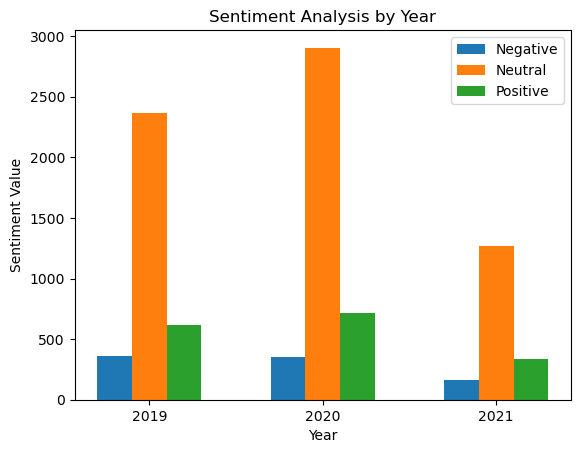

In [6]:
# Load CSV data into a Pandas dataframe
sentiment_counts = pd.read_csv('../3_Trend_Data/sentiment_counts.csv', index_col=0)

# Group the data by year
grouped = sentiment_counts.groupby('year').sum().reset_index()

# Create a bar chart for each sentiment category
plt.bar(grouped['year']-0.2, grouped['negative'], width=0.2, label='Negative')
plt.bar(grouped['year'], grouped['neutral'], width=0.2, label='Neutral')
plt.bar(grouped['year']+0.2, grouped['positive'], width=0.2, label='Positive')

plt.title('Sentiment Analysis by Year')
plt.xlabel('Year')
plt.ylabel('Sentiment Value')
plt.xticks(grouped['year'])
plt.legend()
plt.show()